In [1]:
import joblib
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from render import render_env
from processors import decode_pos
from agent import Agent
from configs import configs
from utils import *

In [2]:
ckp = torch.load('agent.pth', map_location='cpu')
print('ckp keys:', ckp.keys())
print('state dict history priority:', ckp['state_dicts_priority'])

ckp keys: dict_keys(['cfg', 'state_dict', 'optimizer_state_dict', 'ge', 'state_dicts_history', 'state_dicts_priority'])
state dict history priority: [0.13508517 0.43046721 0.34867844 0.10941899 0.25418658 0.12157665
 0.16677182 0.12157665 0.15009464 0.16677182 0.15009464 0.15009464
 0.18530202 0.20589113 0.20589113 0.4782969  0.38742049 0.28242954
 0.38742049 0.20589113 0.18530202 0.15009464 0.18530202 0.16677182
 0.25418658 0.18530202 0.18530202 0.28242954 0.28242954 0.22876792
 0.20589113 0.38742049 0.3138106  0.25418658 0.13508517 0.20589113
 0.3138106  0.34867844 0.34867844 0.38742049 0.22876792 0.38742049
 0.25418658 0.25418658 0.3138106  0.34867844 0.16677182 0.25418658
 0.22876792 0.38742049 0.38742049 0.28242954 0.38742049 0.34867844
 0.34867844 0.28242954 0.34867844 0.3138106  0.20589113 0.25418658
 0.38742049 0.28242954 0.28242954 0.25418658 0.16677182 0.3138106
 0.22876792 0.4782969  0.25418658 0.4782969  0.531441   0.729
 0.59049    0.28242954 0.3138106  0.38742049 0.478296

In [3]:
trajectory = joblib.load('trajectory.jl')
trajectory_env = joblib.load('trajectory_env.jl')
print('buffer keys:', trajectory.keys())

buffer keys: dict_keys(['policy_state', 'value_state', 'action', 'log_prob', 'return', 'advantage', 'action_mask', 'reward', 'value', 'step', 'logit_map'])


In [4]:
render_env(trajectory_env.simulator)

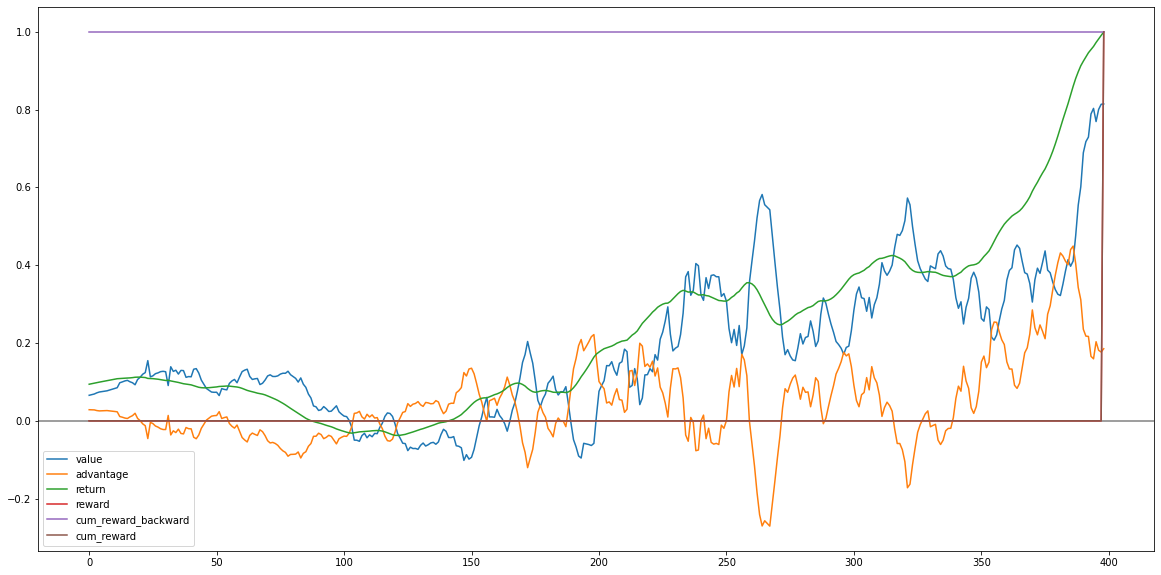

In [5]:
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='grey', linestyle='-')
plt.plot(trajectory['value'], label='value')
plt.plot(trajectory['advantage'], label='advantage')
plt.plot(trajectory['return'], label='return')
plt.plot(trajectory['reward'], label='reward')
plt.plot(trajectory['reward'][::-1].cumsum()[::-1], label='cum_reward_backward')
plt.plot(trajectory['reward'].cumsum(), label='cum_reward')
plt.legend()
plt.show()

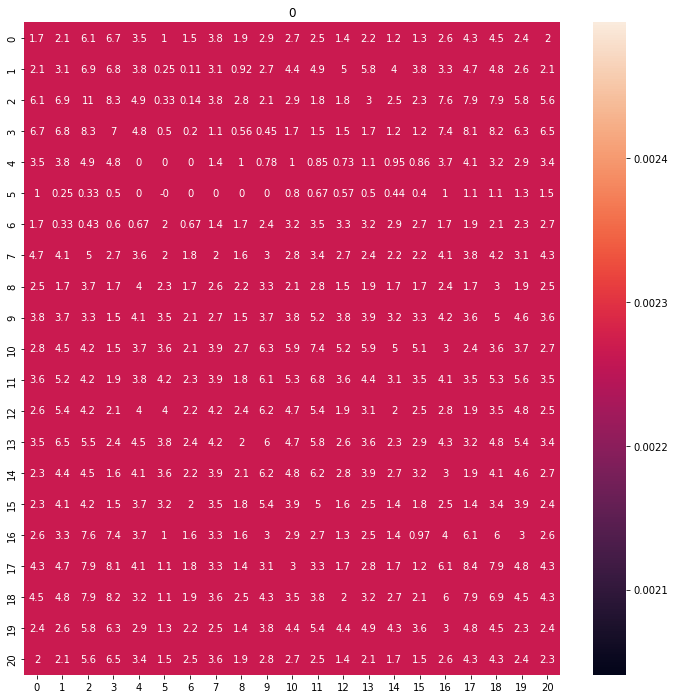

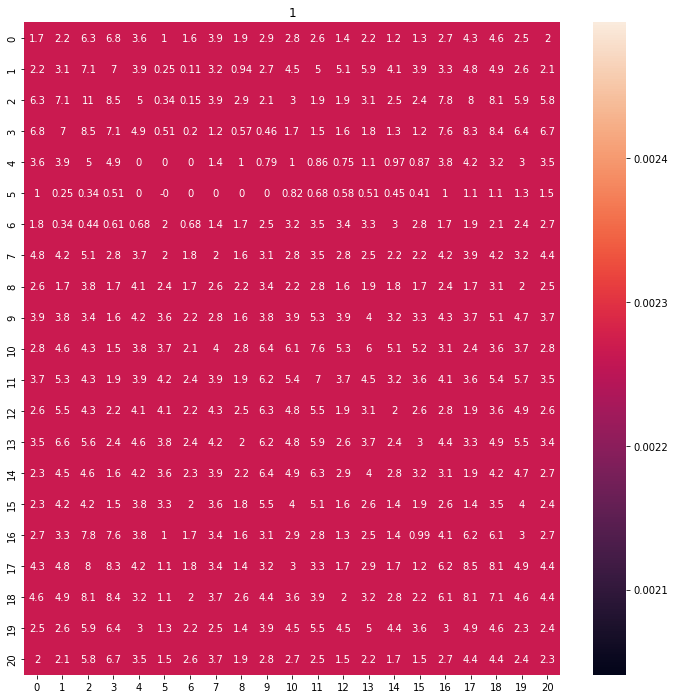

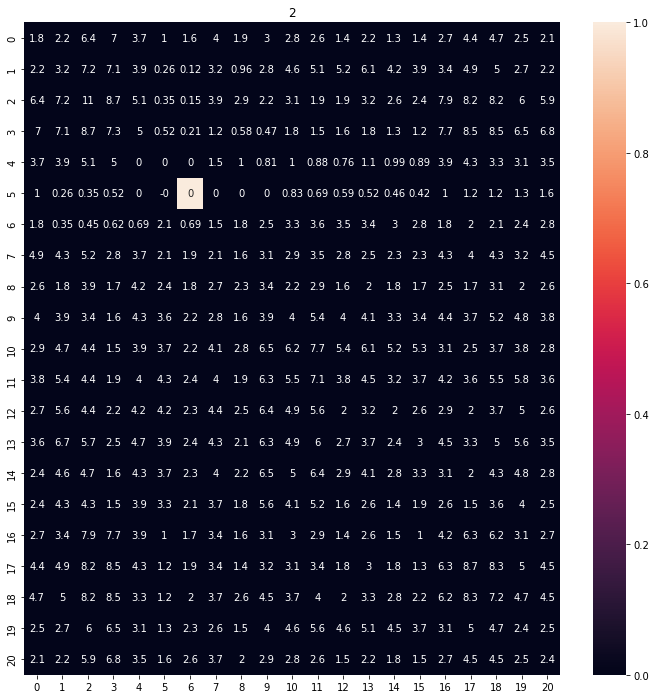

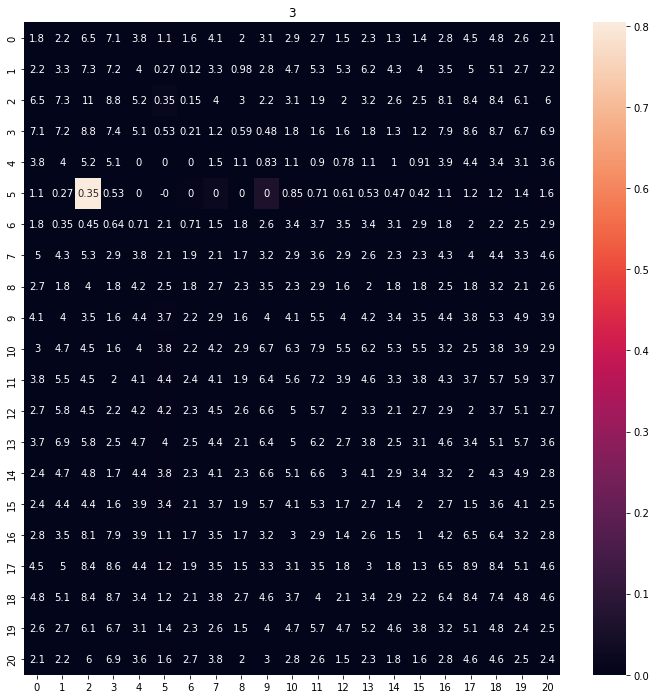

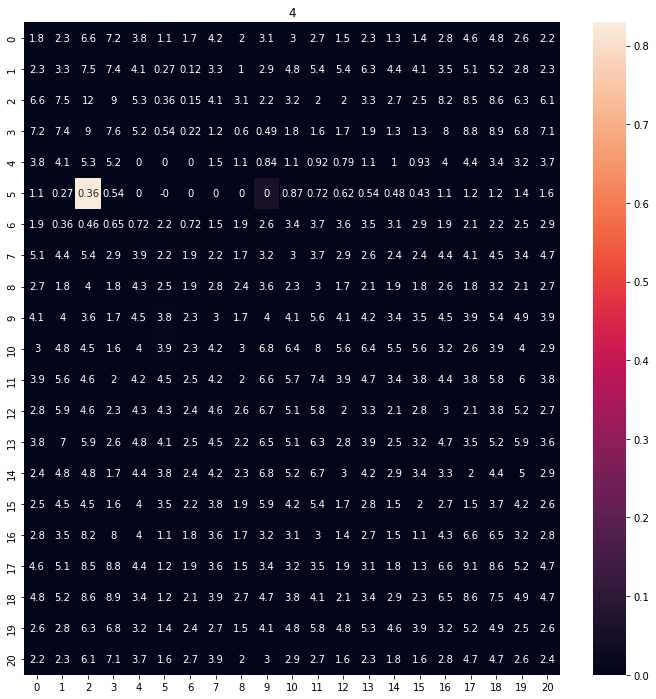

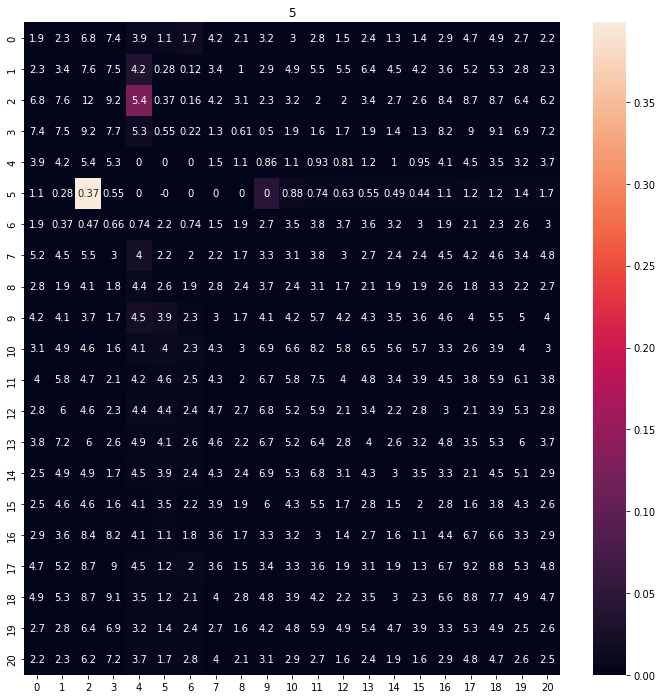

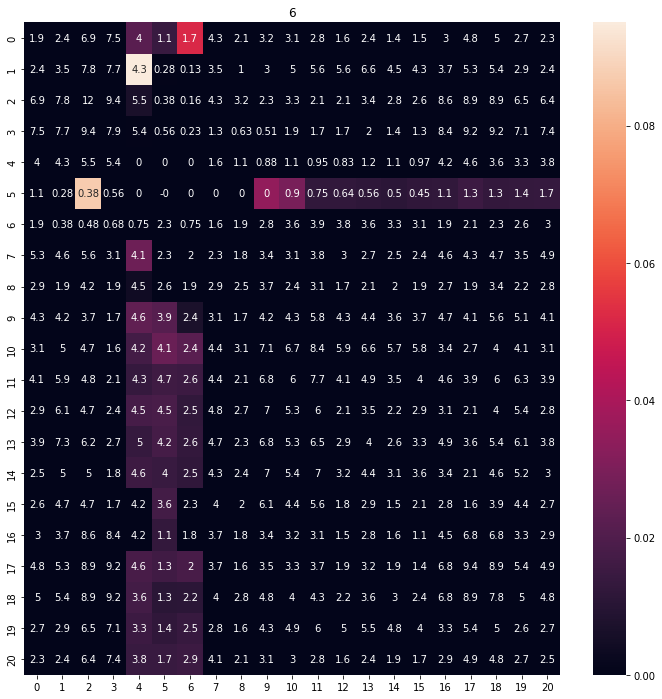

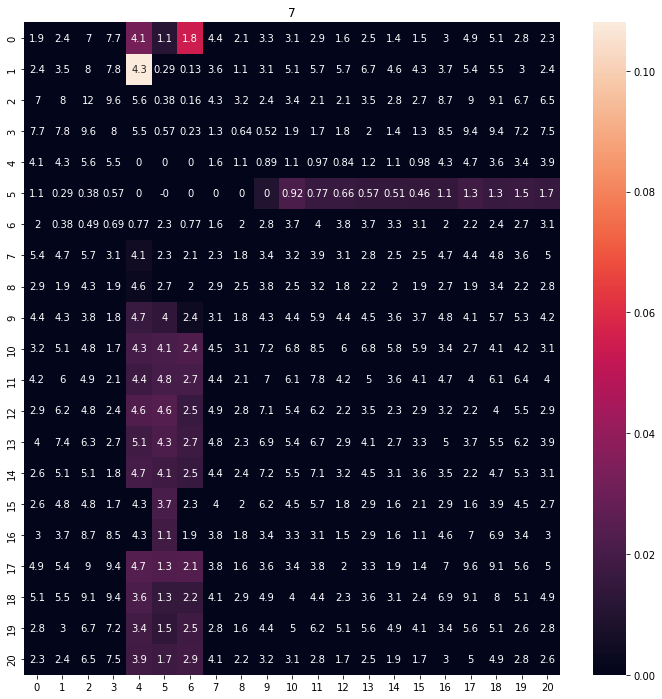

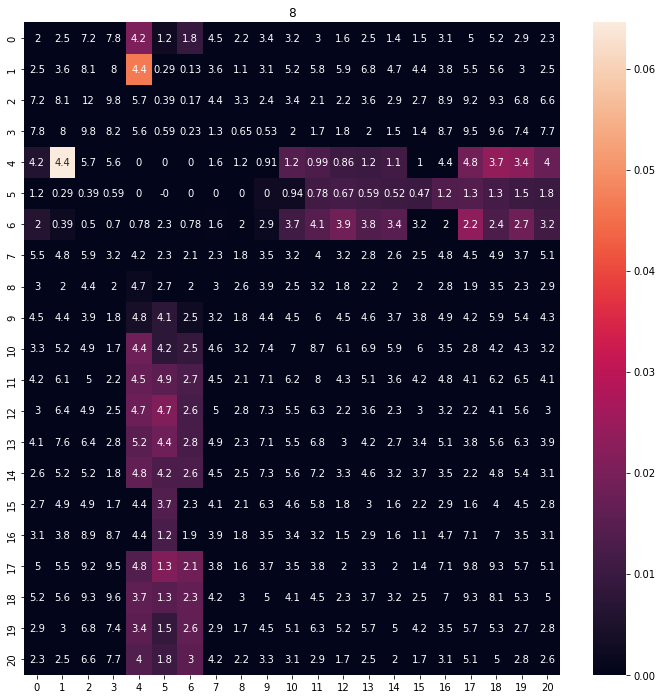

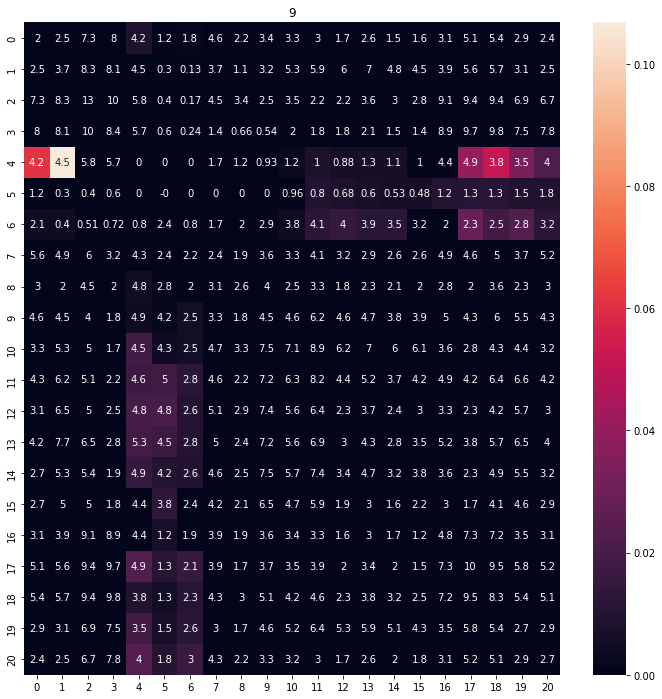

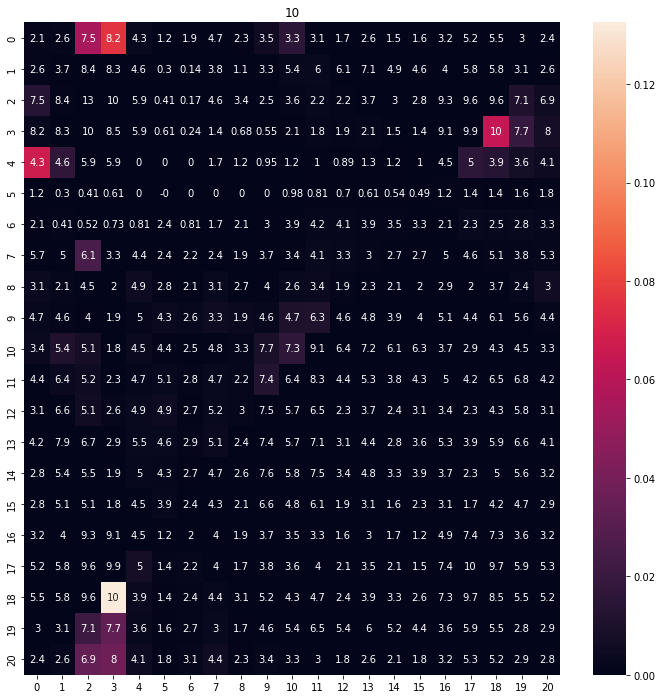

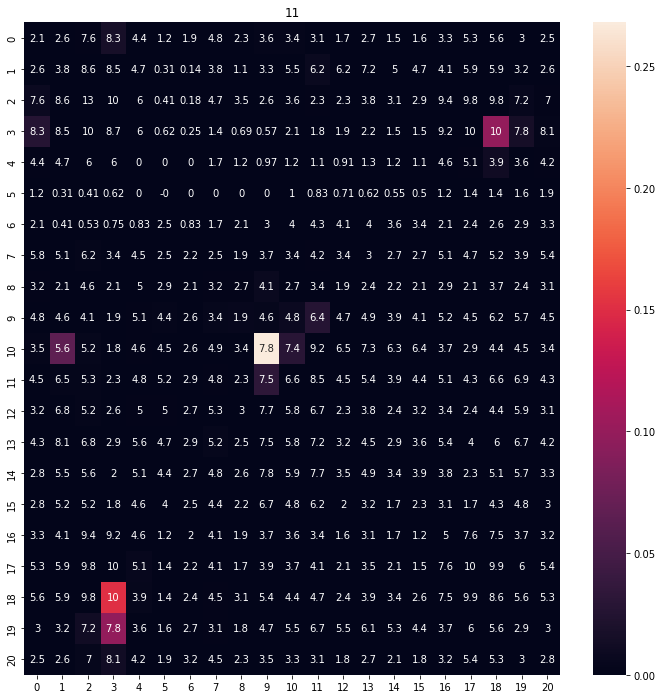

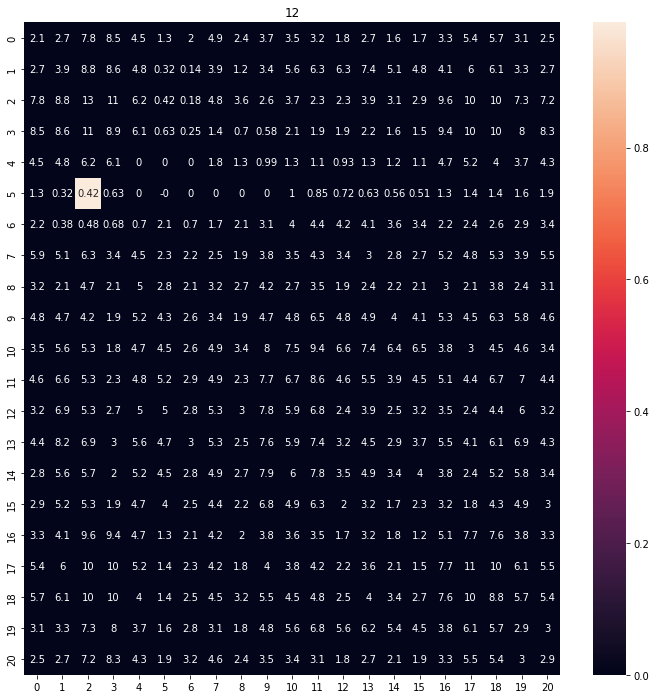

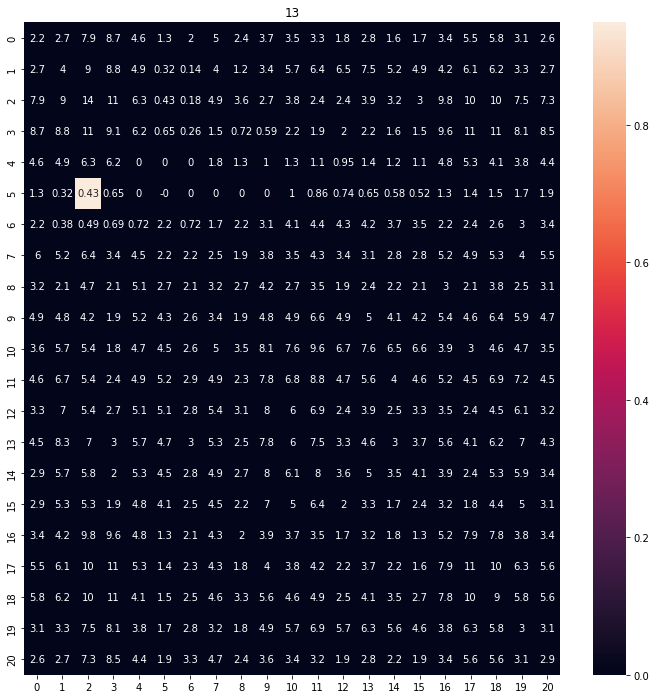

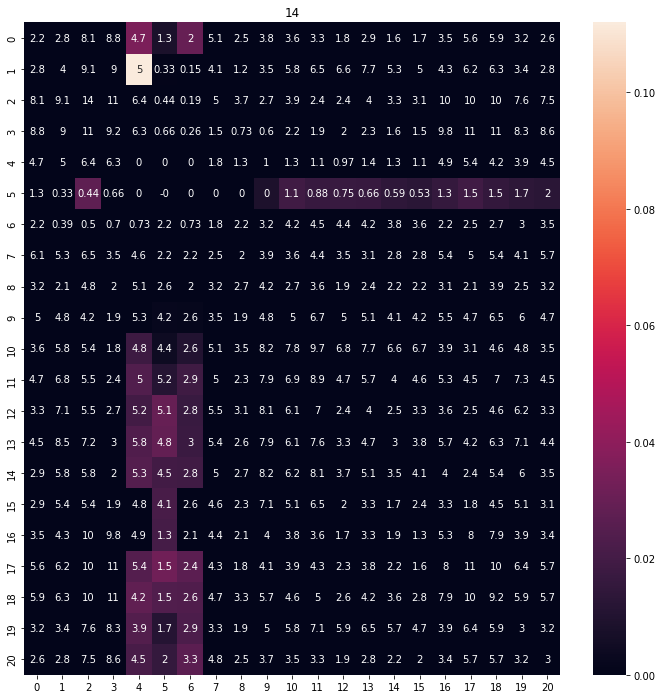

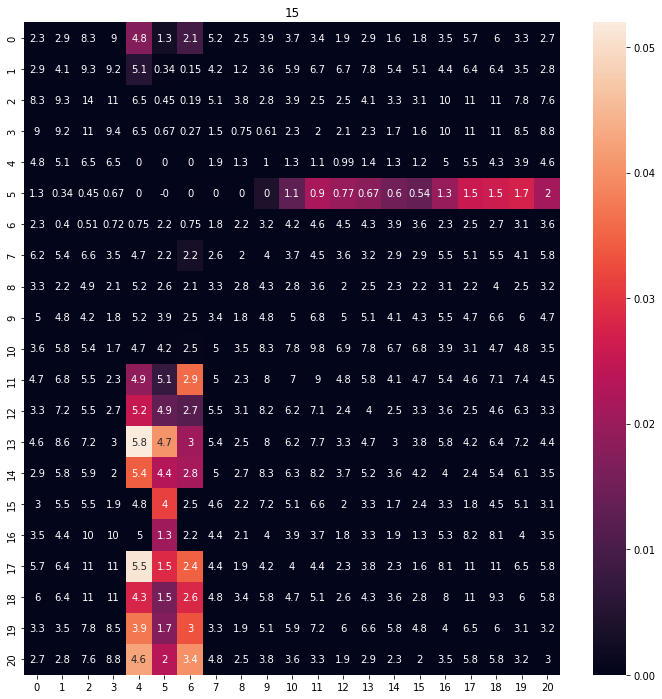

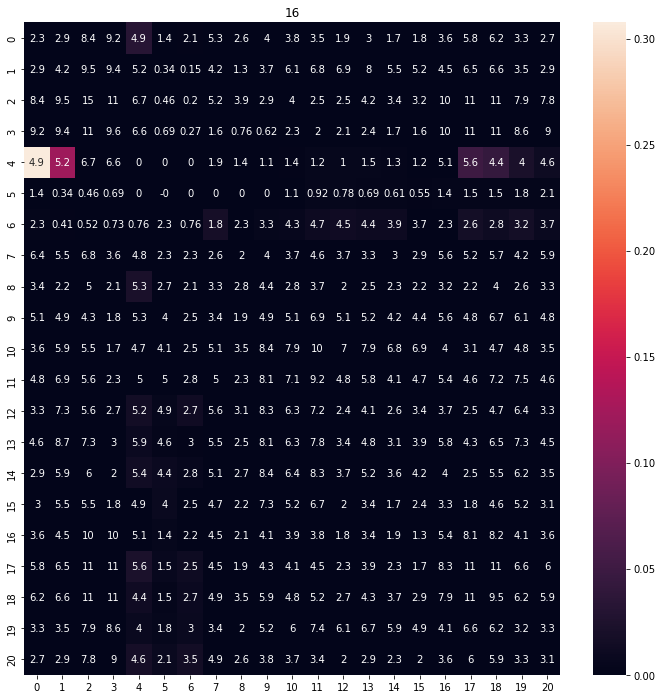

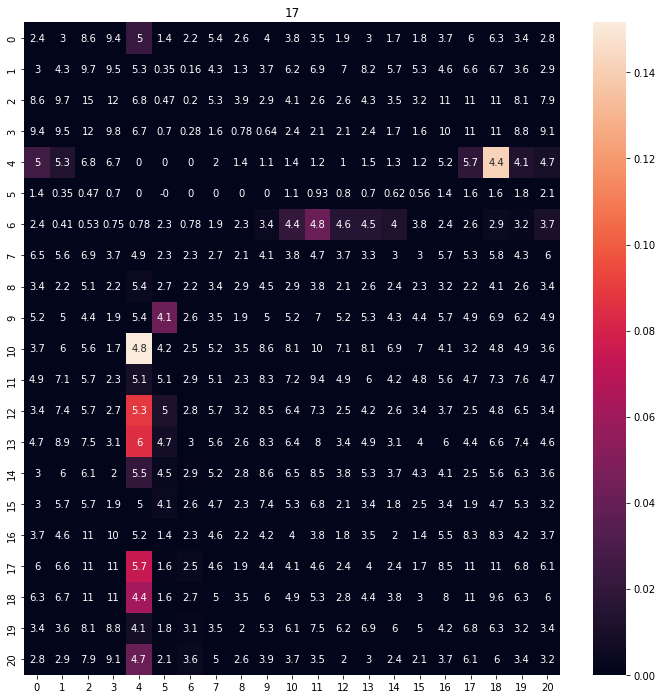

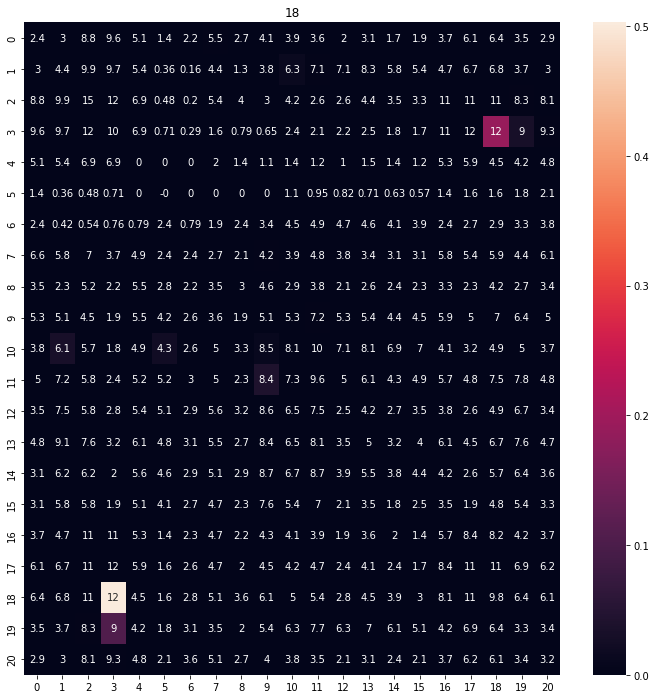

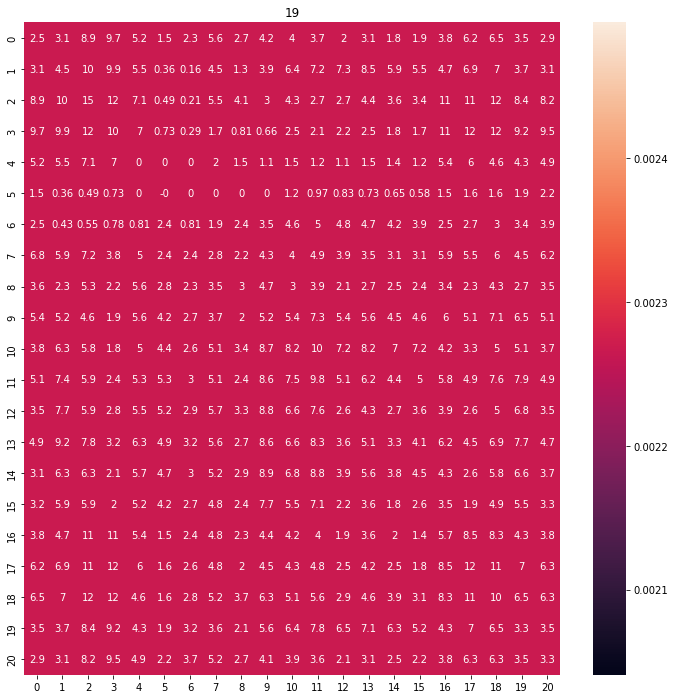

In [9]:
for step in range(0, 20):
    fig, axes = plt.subplots(1, 1, figsize=(12,12))
    mask = trajectory['action_mask'][step]
    masked_target = softmax(np.where(mask, trajectory['logit_map'][step], -1e8), axis=(1, 2))
    sns.heatmap(masked_target[1], ax=axes, annot=trajectory['policy_state'][step, 20])
    plt.title(step)
    plt.show()

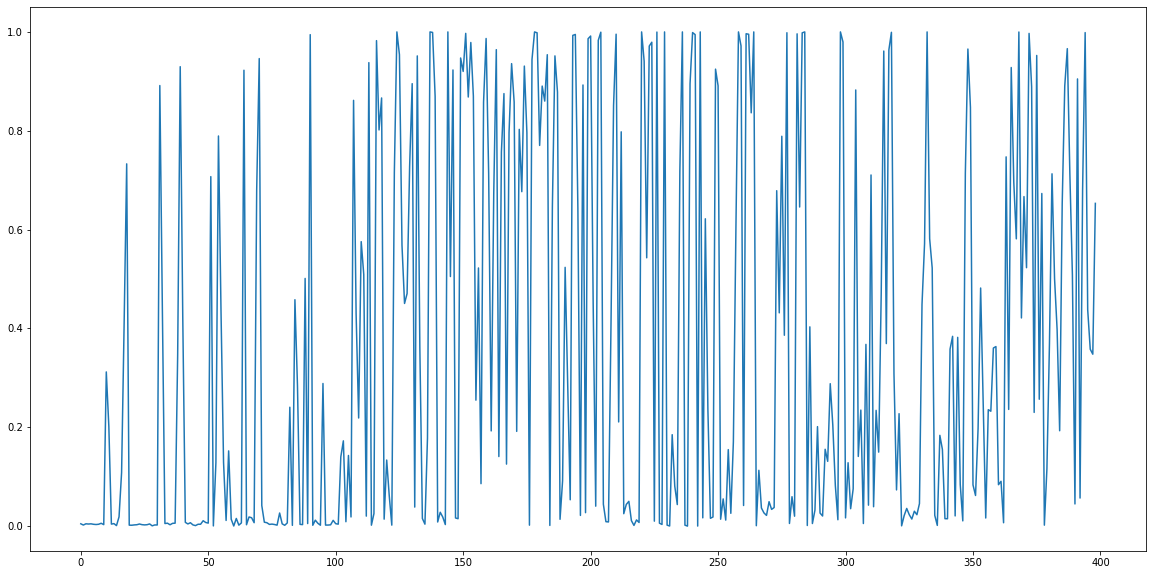

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(np.exp(trajectory['log_prob']))
plt.show()

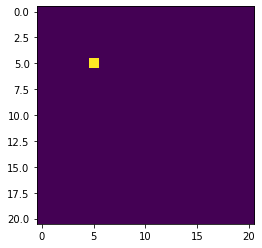

In [8]:
plt.imshow(trajectory['policy_state'][-10][2])